In [45]:
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

           탑승     하차       소요시간
0          박촌     부평  28.675501
1         원인재     선학  12.850614
2       간석오거리  캠퍼스타운  42.736982
3       부평삼거리     귤현  41.520651
4       인천대입구     작전  75.390910
...       ...    ...        ...
99995  지식정보단지     동막  13.775766
99996    부평구청  테크노파크  58.946604
99997    부평시장  테크노파크  59.279655
99998   센트럴파크     계양  92.134176
99999   캠퍼스타운     동막  10.086242

[100000 rows x 3 columns]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[ 2.72247017e+00  3.16455987e+00  4.33616252e+00  4.31322422e+00
  2.64537886e+00  1.53217590e+00  4.35539521e+00  5.58975469e+00
  2.06033570e+00  4.23483601e+00  4.88513667e+00  2.94939704e+00
  2.95698775e+00  2.57081626e+00  2.84843369e+00  5.11828945e+00
  4.94112028e+00 

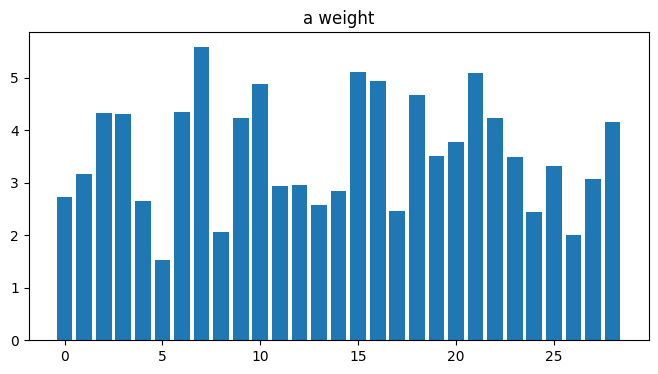

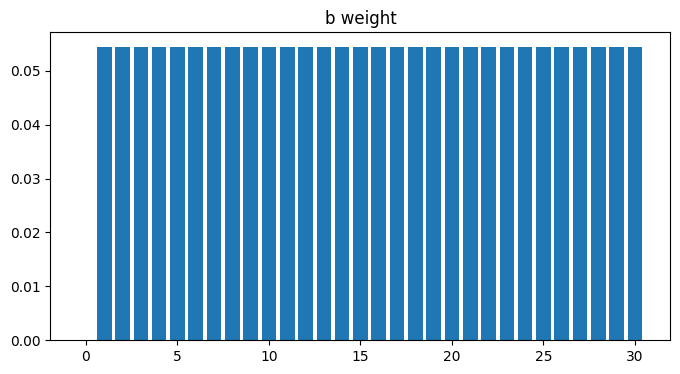

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

name = { 0:"계양", 1:"귤현", 2:"박촌", 3:"임학", 4:"계산", 5:"경인교대입구", \
         6:"작전", 7:"갈산", 8:"부평구청", 9:"부평시장", 10:"부평", 11:"동수", \
         12:"부평삼거리", 13:"간석오거리", 14:"인천시청", 15:"예술회관", \
         16:"인천터미널", 17:"문학경기장", 18:"선학", 19:"신연수", 20:"원인재", \
         21:"동춘", 22:"동막", 23:"캠퍼스타운", 24:"테크노파크", 25:"지식정보단지", \
         26:"인천대입구", 27:"센트럴파크", 28:"국제업무지구", 29:"송도달빛축제공원" }

inv_name = dict( zip(name.values(), name.keys()) )

data = pd.read_csv( "https://jonghank.github.io/ase2010/files/passenger_data.csv", index_col=0)

n = len(name)
K = len(data)

##################
# your code here

# print(n)
# print(inv_name)
print(data)


# print([data['탑승'][i] for i in range(K)])
# print([inv_name[data['탑승'][i]] for i in range(K)])
# print([inv_name[data['하차'][i]] for i in range(K)])

X_a = np.zeros((K, n))
X_b = np.zeros((K, n))

for k in range(K):
    # print(inv_name[data['하차'][k]], end=' ')
    i = inv_name[data['탑승'][k]]
    j = inv_name[data['하차'][k]]
    
    if i < j:
        X_a[k, i:j] = 1
    else:
        X_a[k, j:i] = 1
    
    X_b[i, j] = 1
    X_b[j, i] = 1

print(X_a)
print(X_b)

X = np.hstack([X_a, X_b])
t_obs = data['소요시간'].values.astype(float)

theta = np.linalg.lstsq(X, t_obs, rcond=None)[0]

print(theta)
a_hat = theta[:n-1]
b_hat = theta[n-1:]

plt.figure(figsize=(8,4))
plt.title('a weight')
plt.bar(range(n-1), a_hat)
plt.show()


plt.figure(figsize=(8,4))
plt.title('b weight')
plt.bar(range(n+1), b_hat)
plt.show()

In [47]:
t_pred = X@theta

RMSE = np.sqrt(np.mean((t_obs-t_pred)**2))
print(RMSE)

2.5380307013571075


In [48]:
start = inv_name['예술회관']
end = inv_name['테크노파크']

T_a = np.zeros(n)
T_b = np.zeros(n)

T_a[start:end] = 1
T_b[start] = 1
T_b[end] = 1

T_stack = np.hstack([T_a, T_b])

time = T_stack@theta
print(time+5)

42.43949237710678


### Soft landing

In [141]:
import numpy as np
import matplotlib.pyplot as plt

N = 200
tf = 20
ts = np.linspace(0,tf,N+1)
dt = tf/N
gamma = .05
g = 9.8

A = np.array([[1, 0, (1-0.5*gamma*dt)*dt,                   0],
              [0, 1,                   0, (1-0.5*gamma*dt)*dt],
              [0, 0,        (1-gamma*dt),                   0],
              [0, 0,                   0,        (1-gamma*dt)]])
B = np.array([[0.5*dt**2,         0],
              [        0, 0.5*dt**2],
              [       dt,         0],
              [        0,        dt]])
b = np.array([0, -0.5*g*dt**2, 0, -g*dt])

x0 = np.array([-200, 2000, 40, -300])
x_des = np.array([0, 0, 0, 0])

In [142]:
# draw plots
def draw_plots(ts,x,u):
    # ts: time, (N+1,)-vector
    # x: state trajectory, 4x(N+1) matrix
    # u: control vector, 2xN matrix
    labels = [r'$p_x$',r'$p_y$',r'$v_x$',r'$v_y$',r'$u_x$',r'$u_y$']
    plt.figure(figsize=(14,9), dpi=100)
    for i in range(4):
        plt.subplot(3,2,i+1)
        plt.plot(ts,x[i],label=labels[i])
        plt.legend()
        plt.grid()
    for i in range(2):
        plt.subplot(3,2,i+5)
        plt.plot(ts[:-1],u[i],label=labels[i+4])
        plt.xlabel(r'$t$')
        plt.legend()
        plt.grid()
    plt.show()
    return

# draw 2D plot
def draw_2d_traj(x,u,t1):
    # x: state trajectory, 4x(N+1) matrix
    # u: control vector, 2xN matrix
    N = u.shape[1]
    plt.figure(figsize=(10,10), dpi=100)
    plt.title('Soft landing guidance')
    plt.plot(x[0,:],x[1,:], label='Trajectory')
    _ = 10

    for i in range(0, N, 10):
        __ = np.linalg.norm(u[:,i])/200
        plt.quiver(x[0,i],x[1,i],-u[0,i]*_,-u[1,i]*_, color='magenta', headwidth=1)
        plt.quiver(x[0,i],x[1,i],u[0,i]/__,u[1,i]/__, color='gray', headlength=0, headaxislength=0)

    plt.plot(x[0,0], x[1,0], 'o', markersize=7, label='Initial position')
    plt.plot(x[0,t1], x[1,t1], '*', markersize=7, label=f'Waypoint #1')
    plt.plot(x[0,-1], x[1,-1], '^', markersize=7, label='Final position')

    plt.ylim(-200, 2200)
    plt.xlim(-600,600)
    plt.xlabel(r'$x$ position')
    plt.ylabel(r'$y$ position')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()
    return

In [143]:
##################
# your code here
G = np.zeros((4,2*N))
for t in range(N):
    G[:, 2*t:2*(t+1)] = np.linalg.matrix_power(A, max(0, N-t-1))@B

# np.hstack()
u = np.linalg.lstsq(G, x_des - np.linalg.matrix_power(A, N)@x0 - N*(A@b), rcond=None)[0]

x = np.zeros((4, N+1))
for t in range(N):
    pos = G@u + np.linalg.matrix_power(A, t)@x0 + t*A@b
    x[:, t] = pos

u = u.reshape(2, N)

# print(x[3])/

t1 = 15

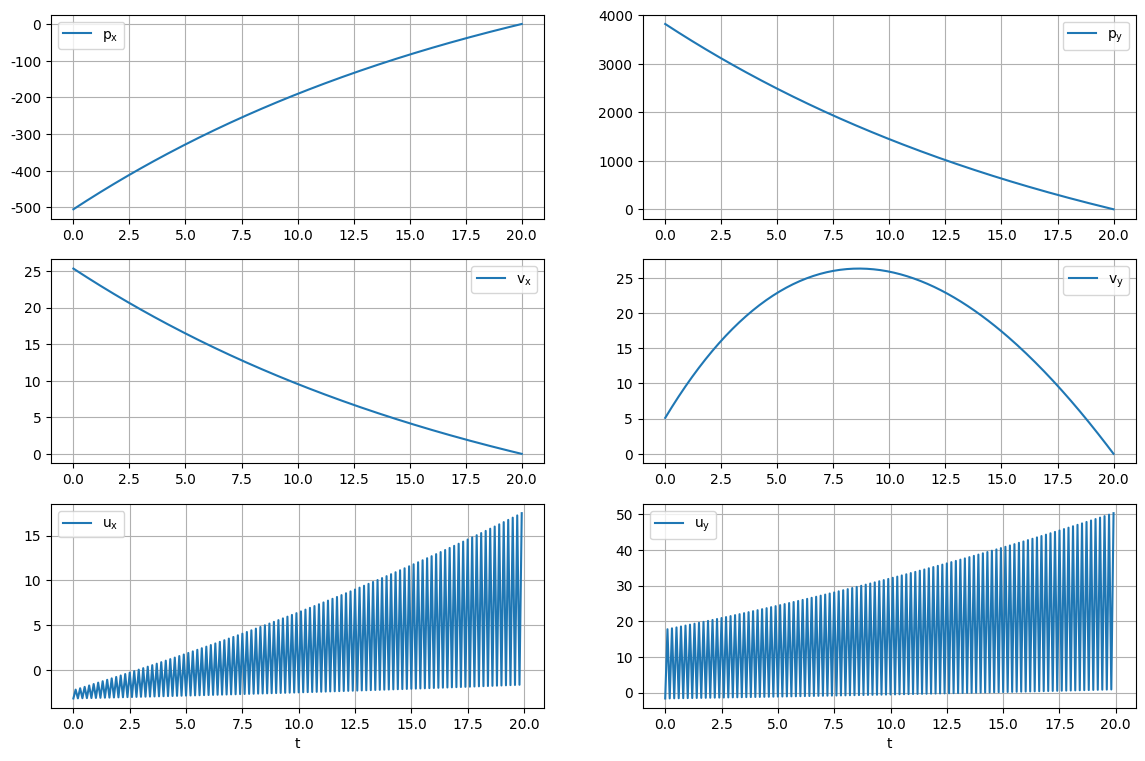

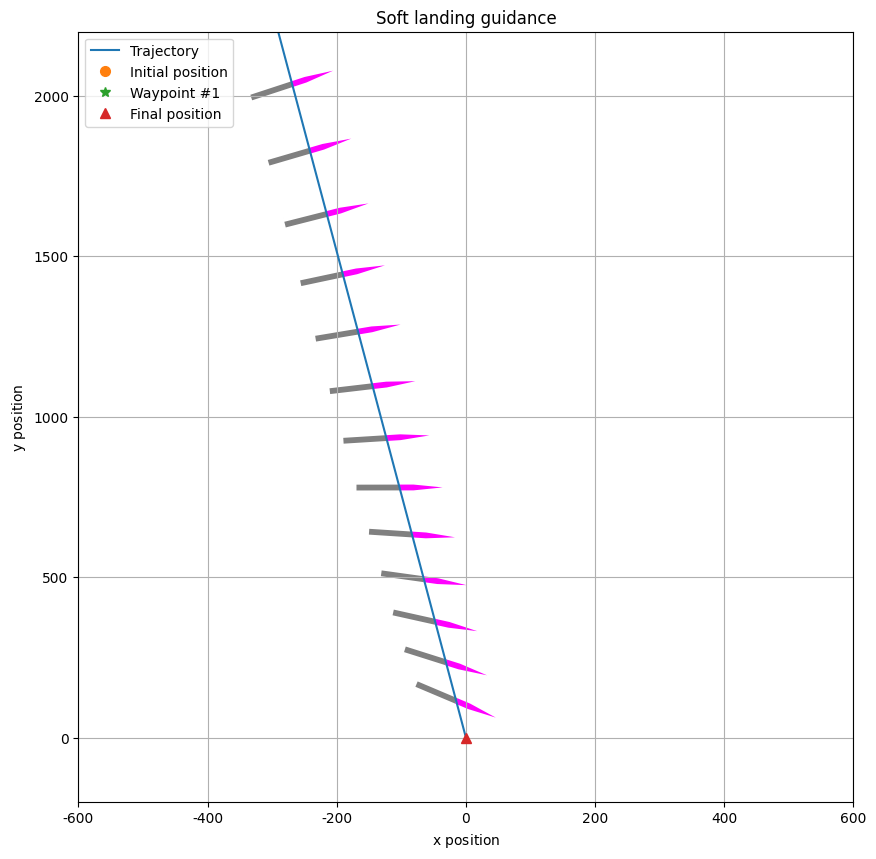

In [144]:
# draw plots
draw_plots(ts,x,u)
draw_2d_traj(x,u,t1)

=== 착륙 결과 ===
최종 위치: [-0.00000, 0.00000] (목표: 0, 0)
최종 속도: [0.00000, -0.00000] (목표: 0, 0)

=== t = 15초 시점 (스텝 150) ===
위치: [3.241, -11.925] (목표: 0, 100)
속도: vx = 0.00000 (목표: 0), vy = 2.975

총 사용 에너지 (∑ ||u_t||²) = 86278.331434


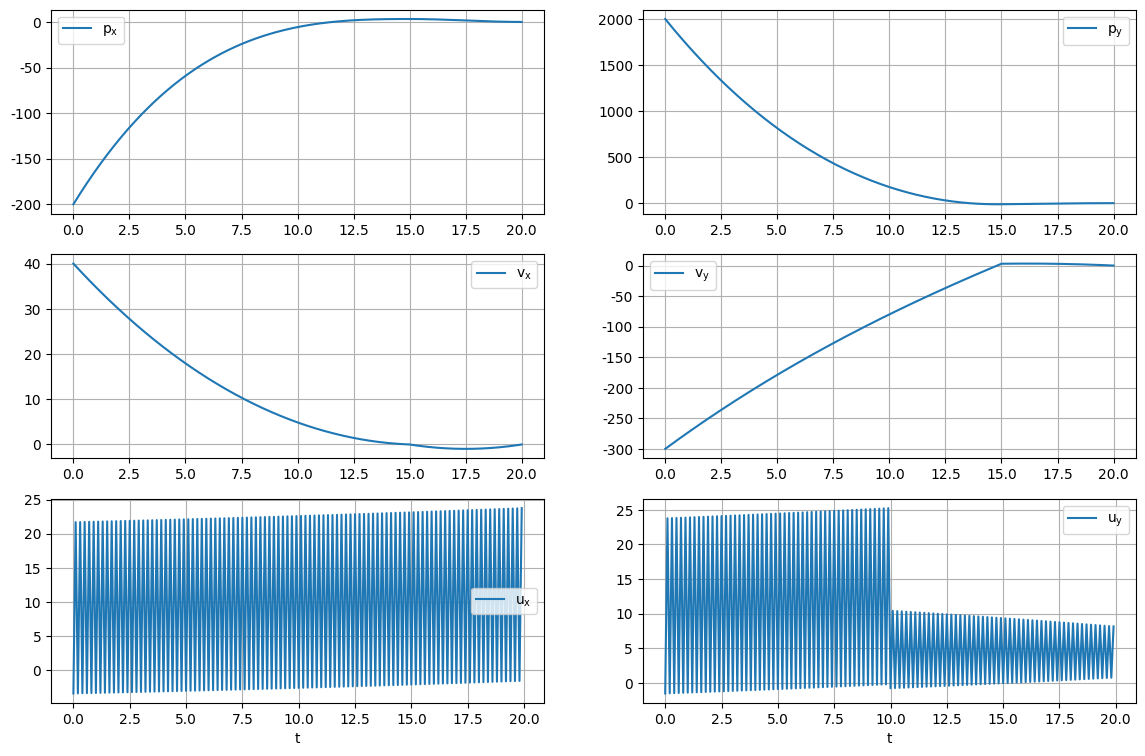

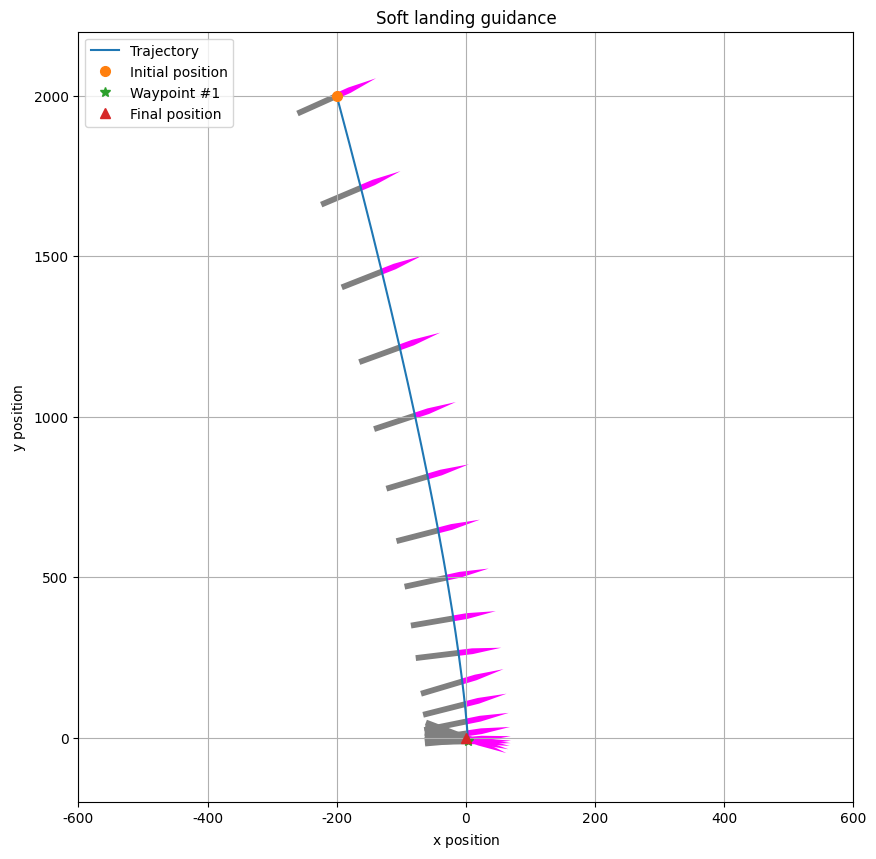

In [145]:
##################
# Problem 2 - Least Norm Solution with Waypoint
##################

import numpy as np

# 이미 주어진 변수들
N = 200
tf = 20
ts = np.linspace(0, tf, N+1)
dt = tf / N
gamma = 0.05
g = 9.8

# A, B, b 행렬 (이미 정확히 주어짐)
A = np.array([[1, 0, (1-0.5*gamma*dt)*dt, 0],
              [0, 1, 0, (1-0.5*gamma*dt)*dt],
              [0, 0, (1-gamma*dt), 0],
              [0, 0, 0, (1-gamma*dt)]])

B = np.array([[0.5*dt**2, 0],
              [0, 0.5*dt**2],
              [dt, 0],
              [0, dt]])

b = np.array([0, -0.5*g*dt**2, 0, -g*dt])

x0 = np.array([-200, 2000, 40, -300])
x_des = np.array([0, 0, 0, 0])

# 추가 조건: t = 15초 (t1_index 시점)에 통과해야 할 상태
t1 = 15.0
t1_index = int(t1 / dt)   # 150번째 인덱스 (t=0,1,...,200)
w_des = np.array([0, 100])  # 위치: (0, 100), 수평속도 vx=0, 수직속도 자유

# ===================================================================
# 1. G 행렬 만들기 (4 x 2N)
# ===================================================================
G = np.zeros((4, 2*N))
for k in range(N):
    pow_val = N - 1 - k
    G[:, 2*k:2*(k+1)] = np.linalg.matrix_power(A, pow_val) @ B

# ===================================================================
# 2. 자유 응답 (free response) 계산
# ===================================================================
# x_free_N = A^N x0 + (A^{N-1} + ... + I) b
x_free_N = np.linalg.matrix_power(A, N) @ x0
for i in range(N):
    x_free_N += np.linalg.matrix_power(A, N-1-i) @ b

# ===================================================================
# 3. 중간 경로점 자유 응답 계산
# ===================================================================
x_free_t1 = np.linalg.matrix_power(A, t1_index) @ x0
for i in range(t1_index):
    x_free_t1 += np.linalg.matrix_power(A, t1_index-1-i) @ b

# ===================================================================
# 4. 제약 조건 행렬 만들기 (총 6개의 등식 제약)
# ===================================================================
# 제약 1: 최종 상태 x_N = x_des  → 4개
# 제약 2: t=t1에서 px=0, py=100, vx=0  → 3개
# 총 7개 제약 → C u = d 로 풀자 (C는 7 x 2N)

C = np.zeros((7, 2*N))
d = np.zeros(7)

# --- 최종 상태 제약 (4개) ---
C[:4, :] = G.copy()                       # G u = x_des - x_free_N
d[:4] = x_des - x_free_N

# --- 중간 경로점 제약 (3개) ---
# t1까지의 G_t1 행렬 만들기 (4 x 2*t1_index)
G_t1 = np.zeros((4, 2*t1_index))
for k in range(t1_index):
    pow_val = t1_index - 1 - k
    G_t1[:, 2*k:2*(k+1)] = np.linalg.matrix_power(A, pow_val) @ B

# 나머지 입력들 (t1_index ~ N-1)도 최종 상태에 영향을 줌
G_remain = np.zeros((4, 2*(N - t1_index)))
for k in range(N - t1_index):
    pow_val = N - 1 - (t1_index + k)
    G_remain[:, 2*k:2*(k+1)] = np.linalg.matrix_power(A, pow_val) @ B

# 전체 G = [G_t1  |  G_remain]
# 따라서 중간 상태 = G_t1 @ u[:2*t1_index] + G_remain @ u[2*t1_index:] + x_free_t1

# 제약 행렬 C에 넣기
C[4:7, :2*t1_index] = G_t1[[0,1,2], :]        # px, py, vx만 제약
C[4:7, 2*t1_index:] = G_remain[[0,1,2], :]    # 나머지 입력들의 영향

# 오른쪽 항
target_t1 = np.array([0, 100, 0])             # px=0, py=100, vx=0
d[4:7] = target_t1 - x_free_t1[[0,1,2]]

# ===================================================================
# 5. 최소 노름 해 구하기 (pinv 사용 → 가장 작은 ||u||를 주는 해)
# ===================================================================
u_vec = np.linalg.pinv(C) @ d                  # (2N,) 벡터

# ===================================================================
# 6. 궤적 시뮬레이션
# ===================================================================
x_traj = np.zeros((4, N+1))
x_traj[:, 0] = x0
x_current = x0.copy()

u_mat = u_vec.reshape(2, N)   # 보기 좋게 2 x N 행렬로

for k in range(N):
    u_k = u_vec[2*k:2*(k+1)]
    x_current = A @ x_current + B @ u_k + b
    x_traj[:, k+1] = x_current

# ===================================================================
# 7. 결과 확인 & 에너지 계산
# ===================================================================
print("=== 착륙 결과 ===")
print(f"최종 위치: [{x_traj[0,-1]:.5f}, {x_traj[1,-1]:.5f}] (목표: 0, 0)")
print(f"최종 속도: [{x_traj[2,-1]:.5f}, {x_traj[3,-1]:.5f}] (목표: 0, 0)")

print(f"\n=== t = 15초 시점 (스텝 {t1_index}) ===")
print(f"위치: [{x_traj[0,t1_index]:.3f}, {x_traj[1,t1_index]:.3f}] (목표: 0, 100)")
print(f"속도: vx = {x_traj[2,t1_index]:.5f} (목표: 0), vy = {x_traj[3,t1_index]:.3f}")

energy = np.sum(u_vec**2)
print(f"\n총 사용 에너지 (∑ ||u_t||²) = {energy:.6f}")

# ===================================================================
# 8. 그래프 그리기
# ===================================================================
draw_plots(ts, x_traj, u_mat)
draw_2d_traj(x_traj, u_mat, t1_index)